In [1]:
cat ~/.netrc | grep 'urs.earthdata.nasa.gov' | wc -l

1


**Now you should be able to use the aws cli from Jupyter.** 

(Note that IPython environment variables behave like they do in the shell, for the most part.)

In [2]:
import os
import s3fs
import requests
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

def begin_s3_direct_access(url: str="https://archive.podaac.earthdata.nasa.gov/s3credentials"):
    response = requests.get(url).json()
    return s3fs.S3FileSystem(key=response['accessKeyId'],
                             secret=response['secretAccessKey'],
                             token=response['sessionToken'],
                             client_kwargs={'region_name':'us-west-2'})

fs = begin_s3_direct_access()

type(fs)

s3fs.core.S3FileSystem

In [3]:
ShortName = "SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1"

ssh_Files = fs.glob(os.path.join("podaac-ops-cumulus-protected/", ShortName, "SWOT_L2_LR_SSH_Expert_001_*.nc"))

len(ssh_Files)

28

In [4]:
ssh_Dataset = xr.open_mfdataset(
    paths=[fs.open(f) for f in ssh_Files],
    engine="h5netcdf",
    combine="nested",
    concat_dim="num_lines",
    mask_and_scale=True,
    decode_cf=True,
    data_vars=["simulated_true_ssh_karin"],
)

print(ssh_Dataset.simulated_true_ssh_karin)

<xarray.DataArray 'simulated_true_ssh_karin' (num_lines: 276276, num_pixels: 71)>
dask.array<concatenate, shape=(276276, 71), dtype=float64, chunksize=(9868, 71), chunktype=numpy.ndarray>
Coordinates:
    latitude         (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    longitude        (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    latitude_nadir   (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
    longitude_nadir  (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      sea surface height
    standard_name:  sea surface height above reference ellipsoid
    units:          m
    valid_min:      [-15000000]
    valid_max:      [150000000]
    comment:        Height of the sea surface free of measurement errors.


In [5]:
sla = ssh_Dataset['simulated_true_ssh_karin']
lat = ssh_Dataset['latitude']
lon = ssh_Dataset['longitude']

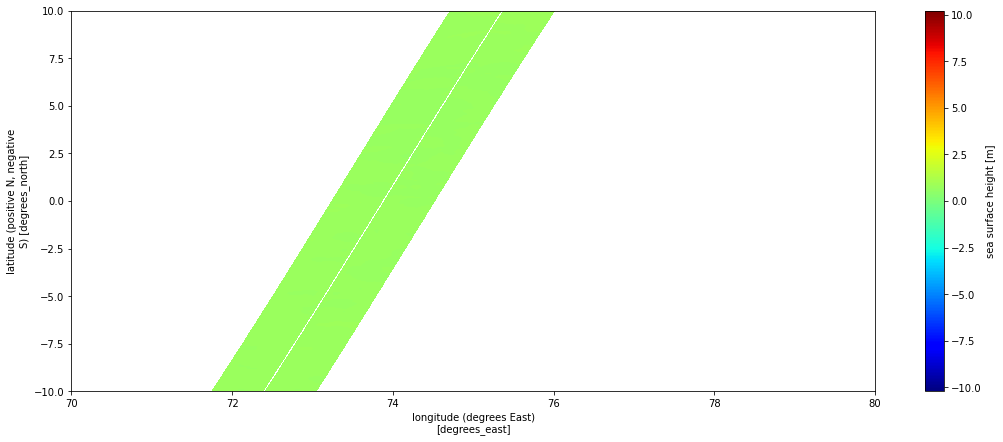

In [6]:
sla.plot(x="longitude", y="latitude", cmap="jet", figsize=(18,7))
plt.xlim(70, 80)
plt.ylim(-10, 10)
plt.show()

In [1]:
sla.plot(x="longitude", y="latitude")

NameError: name 'sla' is not defined